### 1. Loading and preparing the data 

* Download the dataset
* Divide the dataset into train (400) and test (106) datasets
* Check the range of prices in the train and test datasets

Alper Kocabiyik

In [1]:
import numpy as np
import GPy
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import random

In [2]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.209, random_state=42)

In [5]:
print("Price range of train set ",np.amin(y_train),"-",np.amax(y_train))
print("Price range of test set ",np.amin(y_test),"-",np.amax(y_test))

Price range of train set  5.0 - 50.0
Price range of test set  5.0 - 50.0


### 2. Setting and optimizing the model

On the training data set:

a) Build a GP regression model based on a RBF kernel with ARD, in which each input dimension is weighted with a different lengthscale. This enhances interpretability. 

b) Fit the covariance function parameters and noise to the data.  

c) Plot the parameters found for the covariance function. What variables are more important for the regression? 

On the test data set:

d) Plot and evaluate the prediction error using the opmitized parameters. 

2) Try to combine various covariance functions using the element-wise product or the sum of two kernels, and repeat steps b) and c). Comments the results. 

In this [link](http://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/basic_kernels.ipynb) you can see how to define differnt kernels and operate with them.

In [5]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [6]:
# define kernel
ker = GPy.kern.RBF(13,ARD=True)
# create GP model
m = GPy.models.GPRegression(X_train,y_train,ker)
m.optimize(messages=True,max_f_eval = 1000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s17  0002   4.109608e+04   2.178230e+08 
    02s30  0025   1.093131e+03   1.373305e+02 
    03s35  0045   1.043484e+03   4.675739e-02 
    10s68  0163   1.036697e+03   4.471362e-03 
    22s09  0342   1.036202e+03   1.413309e-03 
    37s65  0577   1.036119e+03   8.410276e-05 
    49s60  0759   1.035525e+03   2.972660e-01 

 C:\Users\alper\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:136: RuntimeWarning:overflow encountered in square
 C:\Users\alper\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:invalid value encountered in add



Runtime:     49s60
Optimization status: Converged



In [7]:
print(ker.parameter_names())
print(ker.variance.values)
print(ker.lengthscale.values)

['variance', 'lengthscale']
[517.91253894]
[421.5529344  817.74515819  93.2687583   14.83727935   4.3492698
   3.19482338 217.30227851   4.54312038 297.85173937 163.55846122
  38.00683725 181.5839758   15.17263592]


In [9]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


According to the **lengtscale** values (lower lengthscale value means more importance) most important variable is the 5th varaible ("**RM**": average number of rooms per dwelling). Then others: "NOX", "DIS", ...

In [8]:
#PREDICTION AND Mean Absolute Error

y_pred,_ = m.predict(X_test, full_cov=True)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.9540448407960398


In [9]:
#2# SUM OF TWO DIFFERENT KERNELS

ker2=GPy.kern.ExpQuad(13,ARD=True)
ker_add = ker + ker2
# create GP model
m_add = GPy.models.GPRegression(X_train,y_train,ker_add)
m_add.optimize(messages=True,max_f_eval = 1000)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0000   1.077277e+03           nan 

 C:\Users\alper\Anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


    01s16  0009   1.034444e+03   1.235313e+00 
    05s51  0042   1.028275e+03   9.272640e-01 
    17s15  0129   1.023279e+03   1.594215e+00 
    35s23  0259   1.022358e+03   6.046361e-01 
Runtime:     35s23
Optimization status: Converged



In [10]:
print(ker_add.parameter_names())
print(ker_add.rbf.lengthscale.values)
print(ker_add.ExpQuad.lengthscale.values)

['rbf.variance', 'rbf.lengthscale', 'ExpQuad.variance', 'ExpQuad.lengthscale']
[420.919877   817.78127912  95.36106453   7.60436301   2.58090115
   3.16241819 218.2629814    6.87709543 297.80917354 174.46558144
  37.56152149 187.52083858  18.24227382]
[3.36445998e+01 9.99998670e-01 9.98126270e-01 2.80412867e-08
 4.71935457e+00 8.25044826e-01 1.82548878e+01 5.03183193e-01
 9.96812224e-01 9.99420386e-01 1.00217025e+00 1.16003655e+01
 7.15435846e-01]


In [25]:
#Prediction of SUM OF 2 DIFFERENT KERNELS

y_pred_add,_ = m_add.predict(X_test, full_cov=True)
mae = mean_absolute_error(y_test, y_pred_add)
print("Mean Absolute Error for sum of 2 kernels:", mae)

Mean Absolute Error for sum of 2 kernels: 2.065159247974715


<IPython.core.display.Javascript object>


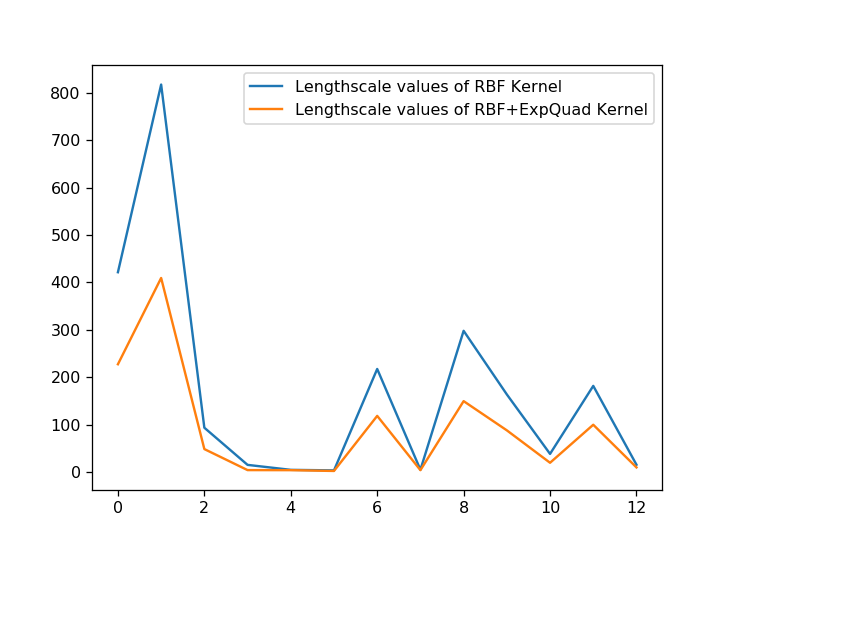

In [34]:
#Plots with 2 kernels
%matplotlib notebook 
p = ker.lengthscale.values
p_add = (ker_add.rbf.lengthscale.values+ker_add.ExpQuad.lengthscale.values)/2
plt.figure()
plt.plot(p, label="Lengthscale values of RBF Kernel")
plt.plot(p_add, label="Lengthscale values of RBF+ExpQuad Kernel")
plt.legend()
plt.show()

**I used sum of 2 different kernels (RBF + ExpQuad). Comparing the MAE scores, they perform very similar (single kernel worked little better).**
 
**According to the plot, order of the variables according to the importance does not change with these 2 kernels.**

### Sparse GP implementation 

Try to implement an sparse version of the GP regressor, optimized to find a set of **inducing points** that the GP relies on to do the prediction. Measure the test error prediction for 20, 40, and 100 inducing points.

In [26]:
m_sparse = GPy.models.SparseGPRegression(X_train,y_train)
print(m_sparse)
m_sparse.optimize('bfgs')


Name : sparse_gp
Objective : 121349.95030893994
Number of Parameters : 133
Number of Optimization Parameters : 133
Updates : True
Parameters:
  sparse_gp.               |     value  |  constraints  |  priors
  inducing_inputs          |  (10, 13)  |               |        
  rbf.variance             |       1.0  |      +ve      |        
  rbf.lengthscale          |       1.0  |      +ve      |        
  Gaussian_noise.variance  |       1.0  |      +ve      |        


In [40]:
#MAE
y_pred_sparse,_ = m_sparse.predict(X_test, full_cov=True)
mae = mean_absolute_error(y_test, y_pred_sparse)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 21.28773584905337


In [28]:
#Randomly chosen 20 inducing points

ins=np.random.choice(400,20)
m_sparse_20 = GPy.models.SparseGPRegression(X_train[ins,:],y_train[ins,:])
print(m_sparse_20)
#m_sparse.inducing_inputs.fix()
m_sparse.optimize('bfgs')


Name : sparse_gp
Objective : 4938.502068232217
Number of Parameters : 133
Number of Optimization Parameters : 133
Updates : True
Parameters:
  sparse_gp.               |     value  |  constraints  |  priors
  inducing_inputs          |  (10, 13)  |               |        
  rbf.variance             |       1.0  |      +ve      |        
  rbf.lengthscale          |       1.0  |      +ve      |        
  Gaussian_noise.variance  |       1.0  |      +ve      |        


In [41]:
#MAE 20
y_pred_sparse_20,_ = m_sparse_20.predict(X_test, full_cov=True)
mae = mean_absolute_error(y_test, y_pred_sparse_20)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 21.287713800936114


In [30]:
#Randomly chosen 40 inducing points

ins=np.random.choice(400,40)
m_sparse_40 = GPy.models.SparseGPRegression(X_train[ins,:],y_train[ins,:])
print(m_sparse_40)
#m_sparse.inducing_inputs.fix()
m_sparse.optimize('bfgs')


Name : sparse_gp
Objective : 9141.082777236019
Number of Parameters : 133
Number of Optimization Parameters : 133
Updates : True
Parameters:
  sparse_gp.               |     value  |  constraints  |  priors
  inducing_inputs          |  (10, 13)  |               |        
  rbf.variance             |       1.0  |      +ve      |        
  rbf.lengthscale          |       1.0  |      +ve      |        
  Gaussian_noise.variance  |       1.0  |      +ve      |        


In [42]:
#MAE 40
y_pred_sparse_40,_ = m_sparse_40.predict(X_test, full_cov=True)
mae = mean_absolute_error(y_test, y_pred_sparse_40)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 21.07303358052602


In [33]:
#Randomly chosen 100 inducing points

ins=np.random.choice(400,100)
m_sparse_100 = GPy.models.SparseGPRegression(X_train[ins,:],y_train[ins,:])
print(m_sparse_100)
#m_sparse.inducing_inputs.fix()
m_sparse_100.optimize('bfgs')


Name : sparse_gp
Objective : 29096.19775717365
Number of Parameters : 133
Number of Optimization Parameters : 133
Updates : True
Parameters:
  sparse_gp.               |     value  |  constraints  |  priors
  inducing_inputs          |  (10, 13)  |               |        
  rbf.variance             |       1.0  |      +ve      |        
  rbf.lengthscale          |       1.0  |      +ve      |        
  Gaussian_noise.variance  |       1.0  |      +ve      |        


In [43]:
#MAE 100
y_pred_sparse_100,_ = m_sparse_100.predict(X_test, full_cov=True)
mae = mean_absolute_error(y_test, y_pred_sparse_100)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 3.4009817938314737


**Each time I increase the *inducing points*, obtained mae score decreased. Training with more data points improved the model performance**